# **Arabic News Topic Classification**

The Hespress Dataset is a collection of 11K news articles labelled by topic and 300K comments with a score by the users associated to each one of them, think of the scores as likes on a Facebook post. This dataset can be used for news article classification which will be our focus in this notebook and for sentimental analysis 

### **Problem Introduction:**

Fortunately, our dataset contains both the articles and their labels, so we are dealing with a supervised learning problem which will make our life much easier since, if wasn’t the case, we would have to manually label each article or go with an unsupervised approach.

In brief, our goal is to predict the topic of an article given its text. In total we have 11 topics:
Tamazight (A Moroccan Language)

*   Sport (Sport)
*   Societe (Society)
*   Regions (Regions)
*   Politique (Politics)
*   Orbites (World news)
*   Medias (News from local newspapers)
*   Faits Divers (Miscellaneous)
*   Economie (Economy)
*   Art Et Culture (Art and culture)



Since the data is stored in different files, each file contains data for a specific topic, we’ll have to loop over the topics and concatenate results.

In [2]:
import pandas as pd
stories=pd.DataFrame()
topics = ["sport","societe","regions","politique","orbites","medias","faits-divers","economie","art-et-culture"]
for topic in topics:
  stories=pd.concat([stories,pd.read_csv("stories_"+topic+".csv")])
stories.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

Next let’s get a sample from the data:

In [3]:
stories.sample(5)

,id,title,date,author,story,topic
332,e9a44c3e055d11eb9741646e69d991ea,"‪ ترشيح أمرابط لنيل لقب ""لاعب الموسم"" في إيطاليا",الخميس 30 يوليوز 2020 - 20:05,أوعنا بلعيد,حصد الدولي المغربي سفيان أمرابط ثمار جهده وتأل...,sport
346,cae6866204ea11eb8901646e69d991ea,"""المنافسة"" ينفي اتخاذ عقوبات ضد شركات محروقات",السبت 25 يوليوز 2020 - 13:37,هسبريس من الرباط,أكد مجلس المنافسة اليوم السبت أن مداولاته لازا...,economie
387,5d2ef8d8055a11ebaab1646e69d991ea,هكذا يُصَرف نظام الجزائر الأزمة الداخلية في إذ...,الخميس 11 يونيو 2020 - 08:00,هسبريس - عبد الرحيم العسري,أزمة دبلوماسية جديدة بين المغرب والجزائر بسبب ...,orbites
244,d893a2a804e511ebb342646e69d991ea,"اغتصاب وقتل ""عدنان"" يعيد نقاش تعديل القانون ال...",الأحد 13 شتنبر 2020 - 10:00,هسبريس - أمال كنين,أدت جريمة خطف واغتصاب وقتل الطفل عدنان بطنجة إ...,societe
482,0d8d76a404df11ebb9bf646e69d991ea,مرحلة جديدة .. هذه رؤية عزيز أخنوش لمغرب ما بع...,الاثنين 13 أبريل 2020 - 20:30,عزيز أخنوش,يعيش العالم عامة والمغرب خاصة وضعا استثنائيا ب...,politique


In [23]:
stories.dtypes

id        object
title     object
date      object
author    object
story     object
topic     object
dtype: object

In [16]:
stories['story']=stories['story'].apply(str)

We can see that we have 5 columns, for this article we are only interested in the story and the topic features.

Now let’s check how much stories we have in each topic, this is extremely important for classification since if we have an **imbalanced dataset** i.e.(we have a lot more datapoints in a topic than the others) our model will be biased and won’t work as well. If we have this problem one common solution is to apply an **under sampling** or **oversampling method**

## **Exploratory Data Analysis:**

We’ll be using seaborn for data visualisation and pandas for data manipulation.

<AxesSubplot:xlabel='topic', ylabel='story'>

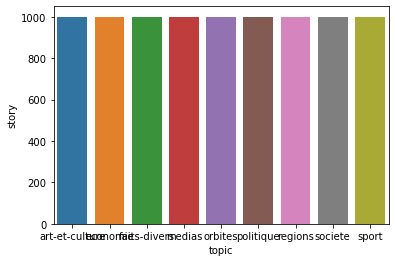

In [4]:
import seaborn as sns
storiesByTopic = stories.groupby(by = "topic").count()["story"]
sns.barplot(x=storiesByTopic.index, y=storiesByTopic)

We can see that we have almost 1000 stories per topic, our dataset is perfectly balanced.

## **Data Cleaning:**

**Removing Stop Words:** some words such as “و”, “كيف” have extremely high recurrence in all Arabic texts and provide no meaning that our model can use to predict. Removing them will reduce noise and let our model focus only on relevant words. To do so we will be using a list and looping over all the articles removing all the words that appear in the list.

In [32]:
from nltk.tokenize import word_tokenize
#This module breaks each word with punctuation which you can see in the output.
file1 = open('list.txt', 'r', encoding='utf-8')
stopwords_arabic = file1.read().splitlines()+["المغرب","المغربية","المغربي"]
#we added ["المغرب","المغربية","المغربي"] because our dataset is from maghreb and contains alot these  words

#a function that takes as input a word and a list of stopwords then check if the word is a stopword then 
#it will be removed else it will stay
def removeStopWords(stopwords):
    stories['story_without_stopwords'] = stories['story'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if not word in stopwords]))

**Removing Punctuation:**

In [40]:
def removePunctuation():
    #\w+ matches any word character (equal to [a-zA-Z0-9_])
    stories['story_clean'] = stories['story_without_stopwords'].str.replace('[^\w\s]','')

**Drawing a WordCloud:**

Reference for wordcloud with Arabic library: https://amueller.github.io/word_cloud/auto_examples/arabic.html

In [9]:
pip install arabic_reshaper

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [12]:
## Make text readable for a non-Arabic library like wordcloud
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def preprocessText(stopwords):
    #calling to function that removes the stopwords
    removeStopWords(stopwords)
    #calling the function that removes the punctuations
    removePunctuation()
preprocessText(stopwords_arabic)

<ipython-input-40-758bbe0567cf>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  stories['story_clean'] = stories['story_without_stopwords'].str.replace('[^\w\s]','')


In [42]:
stories.head()

,id,title,date,author,story,topic,story_without_stopwords,story_clean
0,ad7f145a055c11ebbc5e646e69d991ea,3 أندية تشعل المنافسة على درع البطولة الوطنية,السبت 03 أكتوبر 2020 - 07:50,هسبورت - آمال لكعيدا,رغم أن المستوى التقني العام لمباريات الدوري، م...,sport,رغم المستوى التقني العام لمباريات الدوري، استئ...,رغم المستوى التقني العام لمباريات الدوري استئن...
1,ae3e012c055c11ebb26e646e69d991ea,لامبارد يؤكد غياب زياش مجددا عن نادي تشيلسي,السبت 03 أكتوبر 2020 - 02:30,هسبورت - حمزة اشتيوي,أكد فرانك لامبارد، مدرب نادي تشيلسي الإنجليزي ...,sport,أكد فرانك لامبارد، مدرب نادي تشيلسي الإنجليزي ...,أكد فرانك لامبارد مدرب نادي تشيلسي الإنجليزي ل...
2,af1ce6ec055c11eb9fcc646e69d991ea,"إعفاء البرتغالي ""أروزو"" من تدريب منتخب الشبان",الجمعة 02 أكتوبر 2020 - 20:20,هسبريس من الرباط,وافقت الإدارة التقنية التابعة للجامعة الملكية ...,sport,وافقت الإدارة التقنية التابعة للجامعة الملكية ...,وافقت الإدارة التقنية التابعة للجامعة الملكية ...
3,afffccd4055c11eb9d42646e69d991ea,"""فيفا"" يجري تعديلات على قواعد استدعاء اللاعبين",الجمعة 02 أكتوبر 2020 - 17:47,هسبريس - د.ب.أ,أعلن الاتحاد الدولي لكرة القدم (فيفا) في وقت م...,sport,أعلن الاتحاد الدولي لكرة القدم ( فيفا ) وقت مت...,أعلن الاتحاد الدولي لكرة القدم فيفا وقت متأخ...
4,b0e1a962055c11ebb4fd646e69d991ea,الجامعة الملكية للكراطي تقرر دعم جمعيات رياضية,الجمعة 02 أكتوبر 2020 - 01:41,ياسين أوشن,"قررت ""الجامعة الملكية المغربية للكراطي وأساليب...",sport,قررت `` الجامعة الملكية للكراطي وأساليب مشتركة...,قررت الجامعة الملكية للكراطي وأساليب مشتركة ...


In [48]:
text = stories['story_clean'].values 
comment_words=''
for words in text: 
    comment_words = comment_words + words + ' '

In [69]:
reshaped_text = arabic_reshaper.reshape(comment_words)
bidi_text = get_display(reshaped_text)

In [53]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [72]:
from wordcloud import WordCloud
font_file = './NotoNaskhArabic-Regular.ttf'
wordcloud = WordCloud(width = 800, height = 800,min_font_size = 10,font_path=font_file).generate(bidi_text)

In [73]:
wordcloud.to_file("arabic_example13.png")

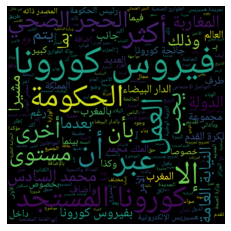

In [76]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Feature engineering:**

Machine learning models are in their essence mathematical equations and can’t understand text, so before running our models we need to transform our text to numbers

*  **Word Count:**

Every columns represents a word from the entire stories corpus, and every row represents a story, the cell values are the frequency in which a word appears in the story!

*  **TF–IDF:**

TF-IDF stands for “Term Frequency Inverse Document Frequency” it uses a slightly more complicated approach which will penalize common words that occur in multiple documents.

We will be using TF-IDF since it has better performance!

In [77]:
#Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

#Vectorize the stories

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(stories["story_clean"])
y=stories.topic

## **Modelling:**

In [87]:
#cross_val_score() function will be used to perform the evaluation
#train_test_split()  function in Sklearn model selection for splitting data arrays into two subsets:
#for training data and for testing data so we don't need to divide the dataset manually
#classification_report() function for performance evaluation metric in machine learning,we use it to show the precision, recall, F1 Score,

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import classification_report

##testModel function will take as input the model name, X: feature and y: label
#We automated the testing model part because it will save us time when testing multiple models such as
#LogisticRegression + SGDClassifier + MultinomialNB + RandomForestClassifier

def testModel(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = model()
    model.fit(X_train,y_train)
    modelName = type(model).__name__
    pred=model.predict(X_test)
    print(modelName)
    print(classification_report(y_test,model.predict(X_test)))
    score=np.mean(cross_val_score(model, X, y, cv=5))

    return model,{"model":modelName,"score":score}

In [83]:
from sklearn.linear_model import LogisticRegression
testModel(LogisticRegression,X,y)

LogisticRegression
                precision    recall  f1-score   support

art-et-culture       0.89      0.97      0.93       201
      economie       0.82      0.86      0.84       204
  faits-divers       0.98      0.95      0.96       209
        medias       0.95      0.89      0.92       207
       orbites       0.73      0.73      0.73       203
     politique       0.76      0.77      0.77       191
       regions       0.78      0.83      0.81       179
       societe       0.76      0.68      0.72       211
         sport       0.98      0.97      0.98       195

      accuracy                           0.85      1800
     macro avg       0.85      0.85      0.85      1800
  weighted avg       0.85      0.85      0.85      1800



(LogisticRegression(),
 {'model': 'LogisticRegression', 'score': 0.8334444444444445})

In [84]:
from sklearn.linear_model import SGDClassifier
testModel(SGDClassifier,X,y)

SGDClassifier
                precision    recall  f1-score   support

art-et-culture       0.89      0.95      0.92       201
      economie       0.81      0.89      0.85       204
  faits-divers       0.96      0.94      0.95       209
        medias       0.95      0.91      0.93       207
       orbites       0.76      0.69      0.72       203
     politique       0.77      0.81      0.79       191
       regions       0.76      0.83      0.79       179
       societe       0.79      0.68      0.73       211
         sport       0.98      0.98      0.98       195

      accuracy                           0.85      1800
     macro avg       0.85      0.85      0.85      1800
  weighted avg       0.85      0.85      0.85      1800



(SGDClassifier(), {'model': 'SGDClassifier', 'score': 0.8388888888888889})

In [85]:
from sklearn.naive_bayes import MultinomialNB
testModel(MultinomialNB,X,y)

MultinomialNB
                precision    recall  f1-score   support

art-et-culture       0.96      0.85      0.90       201
      economie       0.79      0.88      0.84       204
  faits-divers       0.98      0.92      0.95       209
        medias       0.67      0.95      0.79       207
       orbites       0.79      0.66      0.72       203
     politique       0.73      0.82      0.77       191
       regions       0.81      0.72      0.76       179
       societe       0.76      0.63      0.69       211
         sport       0.99      0.97      0.98       195

      accuracy                           0.82      1800
     macro avg       0.83      0.82      0.82      1800
  weighted avg       0.83      0.82      0.82      1800



(MultinomialNB(), {'model': 'MultinomialNB', 'score': 0.788888888888889})

In [86]:
from sklearn.ensemble import RandomForestClassifier
testModel(RandomForestClassifier,X,y)

RandomForestClassifier
                precision    recall  f1-score   support

art-et-culture       0.83      0.96      0.89       201
      economie       0.72      0.85      0.78       204
  faits-divers       0.91      0.97      0.94       209
        medias       0.96      0.84      0.89       207
       orbites       0.76      0.57      0.65       203
     politique       0.66      0.83      0.73       191
       regions       0.71      0.78      0.74       179
       societe       0.80      0.53      0.63       211
         sport       0.97      0.97      0.97       195

      accuracy                           0.81      1800
     macro avg       0.81      0.81      0.80      1800
  weighted avg       0.81      0.81      0.80      1800



(RandomForestClassifier(),
 {'model': 'RandomForestClassifier', 'score': 0.795888888888889})

As we can see the **two most performing models** are:


1.   SGDClassifier
2.   LogisticRegression

Now we will try to imporove our model results using **hyperparameter tuning**

## Hyperparameter tuning

Hyper-Parameter optimisation using **parfit**:

**Parfit** :

A package for parallelizing the fit and flexibly scoring of sklearn machine learning models, with visualization routines.

Parfit gives us the flexibility of evaluating our metric on a separate validation set unlike GridSearchCV which uses cross validation instead.



In [88]:
pip install parfit

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for parfit: filename=parfit-0.220-py3-none-any.whl size=8659 sha256=40e3b58dea528deedbea165df51ae25dc0eb21114de8c03b4757058611a22d37
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\71\ce\ff\5bee3f34f7544130528c250644c041c8eecbafcee5a572acb4
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=d606ca959b728ca98af173d8adce4591579fd5c34464a0c1e162b333e340a0a6
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built parfit sklearn
Note: you may need to restart the kernel to use updated packages.


### Parfit on Logistic Regression:

To read more about **L1 and L2 Regularization:** 

*   [L1 and L2 Regularization — Explained](https://towardsdatascience.com/l1-and-l2-regularization-explained-874c3b03f668)
*   [L1 and L2 Regularization Methods](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)



The two main reasons that cause a model to be complex are:

*   Total number of features (handled by L1 regularization)
*   The weights of features (handled by L2 regularization)

L2 regularization forces weights toward zero but it does not make them exactly zero. L2 regularization acts like a force that removes a small percentage of weights at each iteration. Therefore, weights will never be equal to zero.

penalty: ['l2']

C = 1/λ, where λ is the regularisation parameter. Smaller values of C specify stronger regularisation. Since parfit fits the model in parallel, we can give a wide range of parameters for C without worrying too much about overhead to find the best model.

n_jobs: [-1]

This parameter is used to specify how many concurrent processes or threads should be used 



In [93]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

In [97]:
#package to create the train | valid | test dataset of our desired proportions after sorting the data

In [96]:
pip install fast-ml

Note: you may need to restart the kernel to use updated packages.


In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [ ]:
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

In [150]:
stories_copy.head()

,topic,story_clean
0,sport,رغم المستوى التقني العام لمباريات الدوري استئن...
1,sport,أكد فرانك لامبارد مدرب نادي تشيلسي الإنجليزي ل...
2,sport,وافقت الإدارة التقنية التابعة للجامعة الملكية ...
3,sport,أعلن الاتحاد الدولي لكرة القدم فيفا وقت متأخ...
4,sport,قررت الجامعة الملكية للكراطي وأساليب مشتركة ...


In [152]:
vectorizer = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                      analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 2), use_idf=1, smooth_idf=1, 
                      sublinear_tf=1)
X = vectorizer.fit_transform(stories["story_clean"])
y=stories.topic
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [153]:
LR = LogisticRegression()
LRparam_grid = {
    'C': [ 0.1, 1, 10, ],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': [ 'lbfgs']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)



In [154]:
# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END ..C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END ..C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   9.3s
[CV 2/5] END ..C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=  11.2s
[CV 3/5] END ..C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=  10.0s
[CV 4/5] END ..C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   9.9s
[CV 5/5] END ..C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=  11.5s
[CV 1/5] END ..C=0.1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=0.1, max_iter=200, penalty=l1,

[CV 1/5] END ....C=1, max_iter=400, penalty=l2, solver=lbfgs; total time=  21.8s
[CV 2/5] END ....C=1, max_iter=400, penalty=l2, solver=lbfgs; total time=  23.1s
[CV 3/5] END ....C=1, max_iter=400, penalty=l2, solver=lbfgs; total time=  21.7s
[CV 4/5] END ....C=1, max_iter=400, penalty=l2, solver=lbfgs; total time=  21.2s
[CV 5/5] END ....C=1, max_iter=400, penalty=l2, solver=lbfgs; total time=  23.4s
[CV 1/5] END ....C=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ....C=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ....C=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ....C=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ....C=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END ....C=1, max_iter=500, penalty=l2, solver=lbfgs; total time=  20.4s
[CV 2/5] END ....C=1, max_iter=500, penalty=l2, solver=lbfgs; total time=  22.0s
[CV 3/5] END ....C=1, max_it

[CV 3/5] END ...C=10, max_iter=700, penalty=l2, solver=lbfgs; total time=  41.7s
[CV 4/5] END ...C=10, max_iter=700, penalty=l2, solver=lbfgs; total time=  44.3s
[CV 5/5] END ...C=10, max_iter=700, penalty=l2, solver=lbfgs; total time=  38.1s
Mean Accuracy: 0.864
Config: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


We now have an accuracy of : **0.864** using these params : **Config: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}**

### Testing the model with our new params:

In [157]:
# LRparam_grid = {
#     'C': [ 10 ],
#     'penalty': [ 'l2'],
#     'max_iter': 200,
#     'solver': [ 'lbfgs']
# }
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='l2',C=10,max_iter=200,solver='lbfgs',verbose=3)
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(classification_report(y_test,model.predict(X_test)))
score=np.mean(cross_val_score(model, X, y, cv=5))
print(score)

                precision    recall  f1-score   support

art-et-culture       0.91      0.96      0.94       201
      economie       0.83      0.89      0.86       204
  faits-divers       0.97      0.93      0.95       209
        medias       0.95      0.92      0.93       207
       orbites       0.74      0.74      0.74       203
     politique       0.77      0.79      0.78       191
       regions       0.80      0.84      0.82       179
       societe       0.77      0.70      0.73       211
         sport       0.98      0.97      0.98       195

      accuracy                           0.86      1800
     macro avg       0.86      0.86      0.86      1800
  weighted avg       0.86      0.86      0.86      1800

0.8385555555555557


## Save model for later use

A trained model can be exported and saved so it can be imported and used later. One way to save a model is using Python's joblib module.


In [158]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [159]:
import joblib
# save the model to disk
filename = 'finalized_model_arabic_topic_classification.sav'
joblib.dump(model, filename)

['finalized_model_arabic_topic_classification.sav']